Some visualiser technique examples

In [18]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
import numpy as np

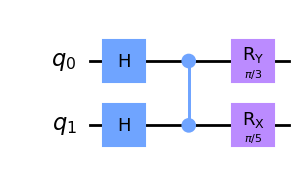

In [24]:
circuit = QuantumCircuit(2)
circuit.h([0,1])
circuit.cz(0,1)
circuit.ry(np.pi/3, 0)
circuit.rx(np.pi/5, 1)
circuit.draw('mpl')

In [25]:
from qiskit.quantum_info import Statevector
state = Statevector.from_int(0, 2**2)
state = state.evolve(circuit)
state.draw('latex')

<IPython.core.display.Latex object>

In [26]:
from qiskit.visualization import array_to_latex
array_to_latex(state)

<IPython.core.display.Latex object>

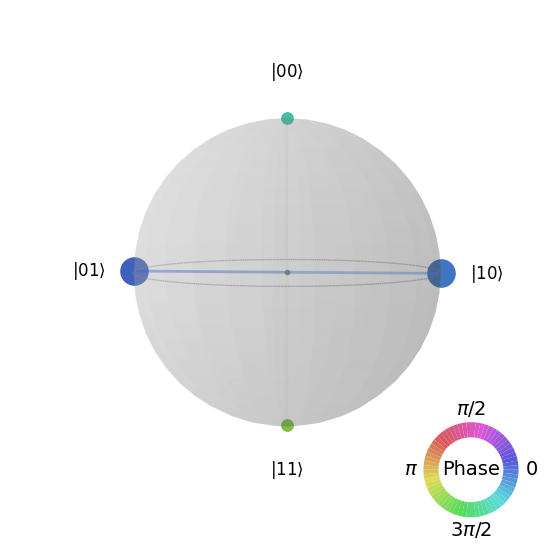

In [27]:
state.draw('qsphere')

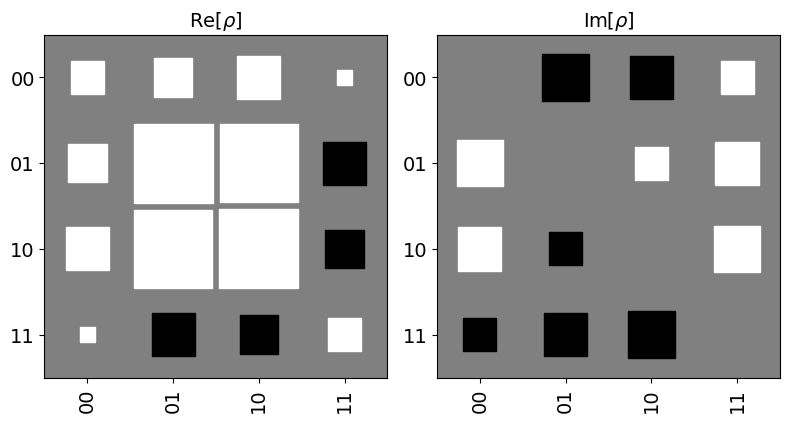

In [28]:
state.draw('hinton')

In [29]:
from qiskit.quantum_info import Operator

U = Operator(circuit)
U.data

array([[ 0.17405542-0.21106253j,  0.64958368-0.05655404j,
         0.17405542+0.21106253j,  0.64958368+0.05655404j],
       [ 0.64958368+0.05655404j, -0.17405542-0.21106253j,
         0.64958368-0.05655404j, -0.17405542+0.21106253j],
       [ 0.64958368-0.05655404j,  0.17405542-0.21106253j,
        -0.64958368-0.05655404j, -0.17405542-0.21106253j],
       [-0.17405542-0.21106253j,  0.64958368+0.05655404j,
         0.17405542-0.21106253j, -0.64958368+0.05655404j]])